# Autómatas celulares unidimensionales

## Introducción y conceptos clave

Considera una línea de $n$ celdas con estados binarios. Denotamos el estado de la celda $i$ en tiempo $t$ por $x_i(t)\in\{0,1\}$.
$$
x(t)=(x_0(t), x_1(t), \dots, x_{N-1}(t))\quad \text{con} \quad x_i(t)\in\{0,1\}
$$

El **vecindario de radio $1$** es:
$$
    v_i(t) \;=\; \bigl(x_{i-1}(t),\,x_i(t),\,x_{i+1}(t)\bigr)\in\{0,1\}^3.
$$
Una **regla elemental** es una función
$$
    f:\{0,1\}^3\longrightarrow\{0,1\},
$$
y la **actualización** es punto a punto:
$$
    x_i(t+1)\;=\;f\!\bigl(x_{i-1}(t),\,x_i(t),\,x_{i+1}(t)\bigr).
$$

### Representación en base 2 de una regla
A cada vecindario $(\ell,c,r)\in\{0,1\}^3$ le asociamos un **índice binario** $k \in\;\{0,1,\dots,7\}.$
Una regla queda determinada por los $8$ bits
$$
    (b_7,b_6,b_5,b_4,b_3,b_2,b_1,b_0)\in\{0,1\}^8,
$$
donde $b_k$ es el valor de la regla en el vecindario cuyo índice es $k$. El **número de regla** $R$ es
$$
    R \;=\; \sum_{k=0}^{7} b_k\,2^k \;\in\;\{0,\dots,255\}.
$$

El convenio de lectura típico (Wolfram) ordena los vecindarios **de mayor a menor** como:
$$
    111,\;110,\;101,\;100,\;011,\;010,\;001,\;000
$$
que corresponden a índices $7,6,5,4,3,2,1,0$, respectivamente.

### Tabla de vecindarios y bits de la regla
La siguiente tabla conceptual muestra cómo se asigna cada vecindario $(\ell,c,r)$ a un índice $k$ y al bit $b_k$ de la regla:

| Vecindario $(\ell,c,r)$ | Índice $k$ | Binario de $k$ | Bit de salida $b_k$ |
|---|:---:|:---:|:---:|
| $(1,1,1)$ | $7$ | $111_2$ | $b_7$ |
| $(1,1,0)$ | $6$ | $110_2$ | $b_6$ |
| $(1,0,1)$ | $5$ | $101_2$ | $b_5$ |
| $(1,0,0)$ | $4$ | $100_2$ | $b_4$ |
| $(0,1,1)$ | $3$ | $011_2$ | $b_3$ |
| $(0,1,0)$ | $2$ | $010_2$ | $b_2$ |
| $(0,0,1)$ | $1$ | $001_2$ | $b_1$ |
| $(0,0,0)$ | $0$ | $000_2$ | $b_0$ |

### Tablas de verdad de reglas elementales

A continuación vemos la correspondencia entre vecindarios y sui regla de correspondencia:

| Vecindario | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |
|:----------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|    Regla   |$f(1,1,1)$|$f(1,1,0)$|$f(1,0,1)$|$f(1,0,0)$|$f(0,1,1)$|$f(0,1,0)$|$f(0,0,1)$|$f(0,0,0)$|

In [26]:
import numpy as np
import pandas as pd

def bits_regla(R: int) -> np.ndarray:
    """
    Devuelve el vector de bits [b_0, ..., b_7] correspondiente a la regla R.
    b_0 es la salida para el vecindario (000) y b_7 para (111).
    """
    R = int(R)
    if not (0 <= R <= 255):
        raise ValueError("La regla R debe estar entre 0 y 255.")
    
    bits_str = format(R, "08b")  # ejemplo: R=30 → '00011110'
    # Convertir cada carácter ('0' o '1') a entero y revertir para que b_0 sea 000
    bits = np.array(list(bits_str[::-1]), dtype=np.uint8)
    return bits

def tabla_regla_horizontal(R: int) -> pd.DataFrame:
    """
    Genera una tabla horizontal con los vecindarios en columnas y la salida de f(a,b,c) para cada uno.
    """
    bits = bits_regla(R)
    patrones = ["111","110","101","100","011","010","001","000"]
    indices = [7,6,5,4,3,2,1,0]
    salidas = [int(bits[k]) for k in indices]

    encabezados = [f"({p[0]},{p[1]},{p[2]})" for p in patrones]
    df = pd.DataFrame([salidas], columns=encabezados, index=[f"Regla {R}"])
    return df

def imprimir(df: pd.DataFrame):
    """
    Imprime un DataFrame centrando cada columna en 9 caracteres.
    """
    # Convertir todo a cadena
    df_str = df.astype(str)
    # Determinar ancho fijo
    ancho = 9
    # Encabezado centrado
    header = "|".join(col.center(ancho) for col in [""] + list(df_str.columns))
    print(header)
    print("-" * len(header))
    # Filas
    for idx, row in df_str.iterrows():
        fila = "|".join([idx.center(ancho)] + [str(val).center(ancho) for val in row])
        print(fila)
    print("-" * len(header))

# Mostrar tablas centradas
for R in [30, 90, 184]:
    print(f"\n=== Regla {R} ===")
    imprimir(tabla_regla_horizontal(R))



=== Regla 30 ===
         | (1,1,1) | (1,1,0) | (1,0,1) | (1,0,0) | (0,1,1) | (0,1,0) | (0,0,1) | (0,0,0) 
-----------------------------------------------------------------------------------------
 Regla 30|    0    |    0    |    0    |    1    |    1    |    1    |    1    |    0    
-----------------------------------------------------------------------------------------

=== Regla 90 ===
         | (1,1,1) | (1,1,0) | (1,0,1) | (1,0,0) | (0,1,1) | (0,1,0) | (0,0,1) | (0,0,0) 
-----------------------------------------------------------------------------------------
 Regla 90|    0    |    1    |    0    |    1    |    1    |    0    |    1    |    0    
-----------------------------------------------------------------------------------------

=== Regla 184 ===
         | (1,1,1) | (1,1,0) | (1,0,1) | (1,0,0) | (0,1,1) | (0,1,0) | (0,0,1) | (0,0,0) 
-----------------------------------------------------------------------------------------
Regla 184|    1    |    0    |    1    |    1

## Implementación con arreglos de `numpy`

Implementaremos una función
$$
\texttt{evolucion\_1d(estado\_inicial,\ regla,\ pasos)}
$$
que devuelva una **matriz** de forma $(\text{pasos}+1)\times N$ cuya fila $t$ es el estado $x(t)$.

- Estados binarios $0/1$ con tipo `uint8`.
- Vecindario de **radio $1$** con **frontera periódica** por omisión (también permitiremos `frontera="fija"`).
- Visualización con `imshow` y `cmap="binary"` (fila $0$ arriba y el tiempo creciendo hacia abajo).

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def bits_regla(R):
    """
    Regresa los bits b[0..7] de la regla R.
    b_0 corresponde a 000 y b_7 a 111.
    (Sin usar operadores de bits: usa formato binario y reversa)
    """
    R = int(R)
    if R < 0 or R > 255:
        raise ValueError("R debe estar entre 0 y 255.")
    bits_str = format(R, "08b")       # p.ej. 30 -> '00011110'
    bits = np.array(list(bits_str[::-1]), dtype=np.uint8)  # invertimos para que b_0 sea 000
    return bits  # arreglo de 8 bits: [b0, b1, ..., b7]

def aplicar_regla(estado, bits):
    """
    Aplica un paso de la regla usando índices con módulo (%) para frontera periódica.
    """
    N = len(estado)
    nuevo = np.zeros(N, dtype=np.uint8)
    for i in range(N):
        izquierda = estado[(i - 1) % N]
        centro    = estado[i]
        derecha   = estado[(i + 1) % N]
        k = 4*izquierda + 2*centro + derecha
        nuevo[i] = bits[k]
    return nuevo

def evolucion_1d(estado_inicial, regla, pasos):
    """
    Devuelve una matriz (pasos+1, N) con la evolución en el tiempo.
    """
    estado = np.asarray(estado_inicial, dtype=np.uint8)
    b = bits_regla(regla)
    N = len(estado)
    M = np.zeros((pasos+1, N), dtype=np.uint8)
    M[0] = estado
    for t in range(pasos):
        estado = aplicar_regla(estado, b)
        M[t+1] = estado
    return M

def visualizar_evolucion(M, titulo=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(M, cmap="binary", interpolation="nearest", aspect="auto")
    plt.xlabel("índice espacial i")
    plt.ylabel("tiempo t (filas)")
    if titulo:
        plt.title(titulo)
    plt.show()

def estado_central(N):
    s = np.zeros(N, dtype=np.uint8)
    s[N//2] = 1
    return s

def estado_aleatorio(N, p=0.5):
    return (np.random.rand(N) < p).astype(np.uint8)


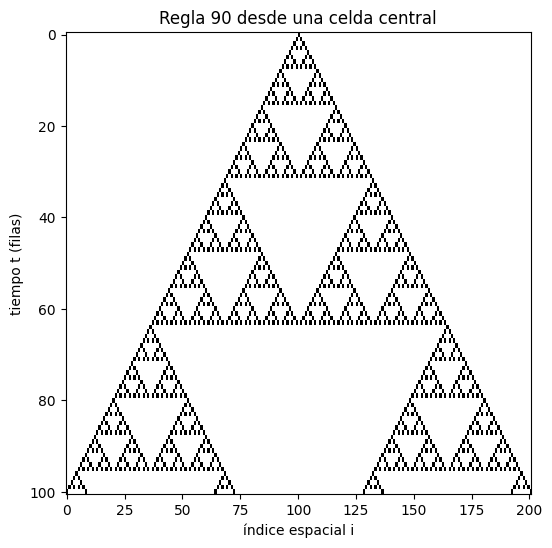

In [31]:

# --- Ejemplo rápido ---
N, T = 201, 100
ini = estado_central(N)
M = evolucion_1d(ini, regla=90, pasos=T)
visualizar_evolucion(M, titulo="Regla 90 desde una celda central")


## Ejercicio: Regla 184

Considera un autómata celular unidimensional binario con frontera **periódica**.  
Interpreta $x_i(t)=1$ como “hay un auto en la celda $i$ al tiempo $t$” y $x_i(t)=0$ como “celda vacía”.  
La **dinámica de tráfico** es la siguiente:

- Un auto **avanza una celda a la derecha** si su celda de la derecha está vacía.  
- Si la celda de la derecha está ocupada, el auto **se queda**.
![Regla184](imgs/Regla184.png "Regla184")
Esta dinámica equivale a la **Regla 184**.  
![Regla184Tabla](imgs/Regla184Tabla.png "Regla184Tabla")

## Parte 1: Implementación 

Implementa una función `evolucion_trafico184(estado_inicial, pasos)` que regrese una matriz de forma $(\text{pasos}+1)\times N$, donde cada fila sea el estado del sistema en un tiempo $t$.

Puedes usar la siguiente **fórmula local** (con frontera periódica) para la celda $i$:

$$
x_i(t+1) \;=\; \big(x_i(t)\land x_{i+1}(t)\big)\;\lor\;\big(x_{i-1}(t)\land \neg x_i(t)\big).
$$

**Intuición:**
- $(x_i \land x_{i+1})$: si la derecha está ocupada, el auto de $i$ **no puede avanzar** y permanece.  
- $(x_{i-1} \land \neg x_i)$: si la izquierda tiene auto y $i$ está **vacío**, un auto **entra** desde la izquierda.

Recuerda usar índices con módulo: $x_{i-1}(t)=x_{(i-1)\bmod N}(t)$ y $x_{i+1}(t)=x_{(i+1)\bmod N}(t)$.



## Parte 2: Visualización
Dibuja la evolución con `imshow` (escala binaria) para observar los patrones de **flujo libre** y **congestión**. Para esto usa las sigueintes condiciones iniciales (densidades de carros).

Prueba tu implementación con $N$ moderado (por ejemplo, $N=200$) y $T$ entre $150$ y $300$ pasos.  
Usa estados iniciales **aleatorios** con distintas densidades de $1$s:

1. **Poca densidad:** $p=0.10$ (≈ 10% de $1s$ o carros).  
2. **Densidad media:** $p=0.50$ (≈ 50% de $1s$ o carros).  
3. **Mucha densidad:** $p=0.90$ (≈ 90% de $1s$ o carros).

Para cada valor de $p$, genera varias realizaciones para comparar.

In [32]:
import numpy as np

# Parámetros del sistema
N = 200   # número de celdas
T = 200   # número de pasos de tiempo

# Función para generar un estado aleatorio con densidad p
def estado_aleatorio(N, p):
    return (np.random.rand(N) < p).astype(np.uint8)

# Condiciones iniciales con diferentes densidades
estado_poca = estado_aleatorio(N, p=0.10)   # 10% de 1s
estado_media = estado_aleatorio(N, p=0.50)  # 50% de 1s
estado_mucha = estado_aleatorio(N, p=0.90)  # 90% de 1s

# Mostrar ejemplos (solo las primeras 40 celdas)
print("Poca densidad (p=0.10):", estado_poca[:40])
print("Densidad media (p=0.50):", estado_media[:40])
print("Mucha densidad (p=0.90):", estado_mucha[:40])

Poca densidad (p=0.10): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1]
Densidad media (p=0.50): [0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1
 0 1 0]
Mucha densidad (p=0.90): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1]



## Parte 4: Interpretación como modelo de tráfico

Responde con base en tus gráficas y simulaciones:

1. **Poca densidad ($p=0.10$):**  
   - ¿Observas **flujo libre** (casi todos los autos avanzan cada paso)?  

2. **Densidad media ($p=0.50$):**  
   - ¿Aparecen **colas** o **ondas de choque** (patrones diagonales o triangulares en el diagrama espacio–tiempo)?  

3. **Mucha densidad ($p=0.90$):**  
   - ¿Predomina la **congestión** (muchos autos bloqueados)?  


